# Code Playground for Percept Data



<b> Data is required to converted into the BIDS-standard. </b>




## 0. Loading packages and functions, defining paths



In [2]:
# Importing Python and external packages
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np

import scipy
import matplotlib.pyplot as plt
from scipy import signal

import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd

#mne
import mne_bids
import mne

In [92]:
# additionally imported from Varvara
# from importlib import reload          # is this necessary?

# from scipy.signal import spectrogram, hanning     # is this necessary?

# from mne.time_frequency import tfr_morlet         # is this necessary?

In [3]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne_bids', mne_bids.__version__)
print('mne', mne.__version__)
print('sci-py', scipy.__version__)

Python sys 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC v.1916 64 bit (AMD64)]
pandas 1.4.4
numpy 1.23.3
mne_bids 0.11.1
mne 1.2.1
sci-py 1.9.3


In [4]:
# create a path to the PyPerceive_Project folder -> project_path
# and a path to the "Data" folder and "Code" folder within the project
project_path = os.getcwd()
while project_path[-18:] != 'PyPerceive_Project':
    project_path = os.path.dirname(project_path)
    
data_path = os.path.join(project_path, 'Data')
code_path = os.path.join(project_path, 'Code', 'PyPerceive', 'code')

project_path, data_path, code_path

('c:\\Users\\jebe12\\Research\\PyPerceive_Project',
 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Data',
 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code')

In [41]:
# change directory to code path???
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code'

In [43]:
# create a path to the current working directory in your PyPerceive Repository -> "code"

import PerceiveImport.methods.find_folders as find_folder # import the created find_folders.py file
importlib.reload(find_folder)

project_path,_= find_folder.find_project_folder()

os.chdir(os.path.join(project_path, 'Code\\PyPerceive\\code'))
os.getcwd()
# import sys
# sys.path.append('/Users/jenniferbehnke/Coding/PyPerceive/code')



'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code'

## 1. Pre-Work - Getting into the Files

### Dataclass Playground

In [77]:
# import the .py file with our dataclass

import PerceiveImport.classes.PerceiveMainClass as MainClass

# to stay uptodate with newly saved files 
# (Import) here is the "as Import" imported PerceiveImport.py file 

importlib.reload(MainClass) 



<module 'PerceiveImport.classes.PerceiveMainClass' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\classes\\PerceiveMainClass.py'>

In [79]:
# define an example instance and fill in the values of the dataclass PerceiveData 
# choose the values you are interested in analyzing further

sub021 = MainClass.PerceiveData(sub = "sub-021", include_modalities=["urvey"])
                
print(sub021)


AssertionError: inserted modality (urvey) shouldbe in ['Streaming', 'Survey', 'Timeline']

In [76]:
sub021.Survey.matfile_list

recModality(sub='sub-021', rec_modality='Survey')

In [163]:
import PerceiveImport.classes.RecModality_class as recMod
importlib.reload(recMod)


<module 'PerceiveImport.classes.RecModality_class' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\classes\\RecModality_class.py'>

In [17]:
subjects = [
    sub021,
    sub021,
]

In [77]:
for sub in subjects:

    print(sub.Streaming.files)

SyntaxError: incomplete input (1682459076.py, line 3)

In [12]:
# dir() should return a list of all the members in the object PerceiveData
# dir(MainClass.PerceiveData)

In [ ]:
# find matfilenames in directory
# create list of paths to matfilenames

### PerceiveMetadata Class: load the PerceiveMetadata.xlsx file and select the files of your choice

In [9]:
# pip install openpyxl
# pip install xlrd
# in environment pyPerceive_dev

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd

# make sure you´re in the right directory to find the existing xlsx file

os.chdir('c:\\Users\\jebe12\\Research\\PyPerceive_Project\Data')
os.getcwd()


'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Data'

In [110]:
project_path,_= find_folder.find_project_folder()

os.chdir(os.path.join(project_path, 'Code\\PyPerceive\\code'))
os.getcwd()

import PerceiveImport.classes.PerceiveMetadataClass as metadata
importlib.reload(metadata)

<module 'PerceiveImport.classes.PerceiveMetadataClass' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\classes\\PerceiveMetadataClass.py'>

In [111]:
mysubject = metadata.PerceiveMetadata("sub-021", "Survey", "3MFU", "M0", "Rest")
mysubject

KeyError: 'timing'

In [128]:
# load PerceiveMetadata Excel sheet as DataFrame
os.chdir('c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Data\\sub-021')
os.getcwd()

PerceiveMetadata = pd.read_excel('Perceive_Metadata_sub-021.xlsx')
PerceiveMetadata

,Perceive_filename,sub,rec_modality,timing,condition,task
0,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
1,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
2,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
3,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
4,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
5,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
6,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
7,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
8,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
9,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN


In [129]:
print(PerceiveMetadata.size, PerceiveMetadata.shape, PerceiveMetadata.ndim)

342 (57, 6) 2


In [130]:
print(PerceiveMetadata.index, PerceiveMetadata.columns) 

RangeIndex(start=0, stop=57, step=1) Index(['Perceive_filename ', 'sub', 'rec_modality', 'timing ', 'condition ',
       'task'],
      dtype='object')


In [131]:
PerceiveMetadata[1:5]

,Perceive_filename,sub,rec_modality,timing,condition,task
1,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
2,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
3,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN
4,sub-20210511PStn_ses-2022052507405881_run-Brai...,sub-021,Streaming,12MFU,NaN,NaN


In [132]:
# print only one specific row -> row index .loc[int]
PerceiveMetadata.loc[[28, 29, 30]]

,Perceive_filename,sub,rec_modality,timing,condition,task
28,sub021_ses-2021080607015296_run-BrainSense2021...,sub-021,Streaming,3MFU,M0,DirectionalStimulation
29,sub021_ses-2021080607015296_run-BrainSense2021...,sub-021,Streaming,3MFU,M0,RingStimulation
30,sub021_ses-2021080607015296_run-BrainSense2021...,sub-021,Streaming,3MFU,M0,FatigueTest


In [133]:
print(PerceiveMetadata.columns.to_list())
PerceiveMetadata.columns = PerceiveMetadata.columns.str.strip() # this fixes an error when I want to print column "condition"

['Perceive_filename ', 'sub', 'rec_modality', 'timing ', 'condition ', 'task']


In [136]:
print(PerceiveMetadata["Perceive_filename"].to_list())

['sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525075300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082000.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082800.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525084300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525085300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090600.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525091000.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525093200.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525094300.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095000.mat', 'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095100.mat', 'sub-20210511PStn_ses-202205250740588

In [30]:
#PerceiveMetadata.values[29:31]
PerceiveMetadata["timing"]

0      12MFU
1      12MFU
2      12MFU
3      12MFU
4      12MFU
       ...  
57    Postop
58    Postop
59      3MFU
60      3MFU
61      3MFU
Name: timing, Length: 62, dtype: object

In [107]:
# how to get a row of a specific value?

made_up_matfile_list = ['sub021_ses-2021080602000195_run-BrainSense20210806022200.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806023800.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

# newDF = pd.DataFrame()

newDF = PerceiveMetadata[PerceiveMetadata["Perceive_filename"].isin(made_up_matfile_list)]
newDF
    

,Perceive_filename,sub,rec_modality,timing,condition,task
21,sub021_ses-2021080602000195_run-BrainSense2021...,sub-021,Streaming,3MFU,M0StimUp,DirectionalStimulation
22,sub021_ses-2021080602361095_run-BrainSense2021...,sub-021,Streaming,3MFU,M0,DirectionalStimulation
23,sub021_ses-2021080602361095_run-BrainSense2021...,sub-021,Streaming,3MFU,M0,DirectionalStimulation


In [101]:
# how to create a new data frame from selecting specific rows form existing dataframe 
NewPerceiveDF = PerceiveMetadata.loc[PerceiveMetadata.Perceive_filename == 'sub021_ses-2021080602000195_run-BrainSense20210806022200.mat']
NewPerceiveDF

,Perceive_filename,sub,rec_modality,timing,condition,task
21,sub021_ses-2021080602000195_run-BrainSense2021...,sub-021,Streaming,3MFU,M0StimUp,DirectionalStimulation


In [137]:
made_up_matfile_list = ['sub021_ses-2021080602000195_run-BrainSense20210806022200.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806023800.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

# extract only the .mat files from the list with the corresponding column values

#rownumber_list = []
#PerceiveMetadataSelection = PerceiveMetadata[PerceiveMetadata.Perceive_filename == 'sub021_ses-2021080602000195_run-BrainSense20210806022200.mat']

NewPerceive = pd.DataFrame()

for filename in PerceiveMetadata["Perceive_filename"]:
    if filename in made_up_matfile_list:
        NewPerceive.append(PerceiveMetadata.loc[PerceiveMetadata.Perceive_filename == filename])

NewPerceive


C:\Users\jebe12\AppData\Local\Temp\ipykernel_16344\3634165910.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NewPerceive.append(PerceiveMetadata.loc[PerceiveMetadata.Perceive_filename == filename])
C:\Users\jebe12\AppData\Local\Temp\ipykernel_16344\3634165910.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NewPerceive.append(PerceiveMetadata.loc[PerceiveMetadata.Perceive_filename == filename])
C:\Users\jebe12\AppData\Local\Temp\ipykernel_16344\3634165910.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NewPerceive.append(PerceiveMetadata.loc[PerceiveMetadata.Perceive_filename == filename])


""


In [140]:
made_up_matfile_list = ['sub021_ses-2021080602000195_run-BrainSense20210806022200.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806023800.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

matpath_list = ['xxx\\sub021_ses-2021080602000195_run-BrainSense20210806022200.mat', 
'XXXX\\sub021_ses_-2021080602361095_run-BrainSense20210806023800.mat', 
'XXX\XXXXX\XXXXXX\\sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

new_path_list = []
for path in matpath_list:
    for f in made_up_matfile_list:
        if f in path:
            new_path_list.append(path)

new_path_list

['xxx\\sub021_ses-2021080602000195_run-BrainSense20210806022200.mat',
 'XXX\\XXXXX\\XXXXXX\\sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

In [59]:
# PerceiveMetadata_selection = PerceiveMetadata[(PerceiveMetadata.timing == "3MFU").all() & (PerceiveMetadata.condition == "MedOff").any()]
# PerceiveMetadata_selection 

# define conditions
cond_sub = PerceiveMetadata["sub"] == "sub-021"
cond_rec_modality = PerceiveMetadata["rec_modality"] == "Survey"
cond_timing = PerceiveMetadata["timing"] == "3MFU"
cond_condition = PerceiveMetadata["condition"] == "M0"
cond_task = PerceiveMetadata["task"] == "Rest"


# note all() means all conditions have to be true (alternatively: any() -> printing if any arument is true)
PerceiveMetadata_selection = PerceiveMetadata[[all([a,b,c,d,e]) for a, b, c, d, e in zip(cond_sub, cond_rec_modality, cond_timing, cond_condition, cond_task)]]
PerceiveMetadata_selection


,Perceive_filename,sub,rec_modality,timing,condition,task
42,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
43,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
44,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
45,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
46,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
47,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest


In [119]:

PerceiveMetadata_selection = PerceiveMetadata[PerceiveMetadata["task"] == "Rest"]
PerceiveMetadata_selection


,Perceive_filename,sub,rec_modality,timing,condition,task
42,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
43,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
44,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
45,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
46,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest
47,sub021_ses-2021080607015296_run-LMTD2021080607...,sub-021,Survey,3MFU,M0,Rest


In [121]:
matfile_list = [PerceiveMetadata_selection.Perceive_filename.values]
matfile_list


AttributeError: 'DataFrame' object has no attribute 'Perceive_filename'

In [86]:
made_up_matfile_list = ['sub021_ses-2021080602000195_run-BrainSense20210806022200.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806023800.mat', 
'sub021_ses-2021080602361095_run-BrainSense20210806024200.mat']

PerceiveFilename_List = []
rowvalues = []

for data in ws["A"]:
    if data.value in made_up_matfile_list:
        PerceiveFilename_List.append([data.value for data in ws[data.value(row)]]) # append a list of all values in the row of data

        #for row in ws:
        #    rowvalues.append(data.value for data in row)
        
PerceiveFilename_List
#rowvalues
# make an array with lists only of the chosen subject and rec_modality .mat files and their corresponding row

# find rownumber for i in matfile_list
# rownumber_list = []

# for i in matfile_list make a list of the corresponding rownumber in Excel sheet 


# create dictionary with keys=matfilenames : values=rowvalue_list
# {'sub021_ses-2021080602361095_run-BrainSense20210806024200.mat': ["sub-021", "Streaming", "MedOff", "Rest"]}
# PerceiveMetadataDict = {matfile_list : rowvalues}

# for i in rownumber_list make a list of all columns within the row-number of that 
# make an array with every row_list
# matfile_rowlist = []
# for col in ws.columns:
#   if (data.value for data in col) == (file for file in matfile_list):
#       append.to.newlist [data.value for data in row["rownumber_of_matfile"]]

# np.array()

TypeError: 'str' object is not callable

### Add .mat files from your directory to your PerceiveMetadata.xlsx file  

In [71]:
# make sure you´re in the right directory of your xlsx file
# and openpyxl is imported


# load existing .xlsx file
wb = load_workbook('Perceive_Metadata.xlsx')
ws = wb.active # this gets the current active worksheet

# access the single row number from your workingsheet
for data in ws["24"]: # "2" refers to Excel sheet row 2
    print(data.value)

# access all cells in every single row
# for row in ws.rows:
#     print([data.value for data in row])

# access all cells in a single column 
# for data in ws["A"]: # "A" refers to Excel sheet column A
#     print(data.value)

# read all data present in the Excel sheet
# for row in ws:
#     print([data.value for data in row]) # indexing will make a list of every row

# find the max row number from your Excel sheet
# max_rows = ws.max_row

# cellvalue = ws.cell(row=1, column=1).value
# cellvalue

sub021_ses-2021080602361095_run-BrainSense20210806023800.mat
sub-021
Streaming
3MFU
MedOff
Directional stimulation 


In [56]:
# insert a list into an Excel column using openpyxl

PythonList = [1,2,3] # list I want to append to a specific column

max_rows = ws.max_row
row_start = max_rows + 1
column_index = 1

for i, value in enumerate(PythonList, start=row_start):
    ws.cell(row=i, column=column_index).value = value

wb.save("added_column_cells.xlsx")

In [81]:
import PerceiveImport.methods.matfiles_to_xlsx as mat_to_xlsx
importlib.reload(mat_to_xlsx)

<module 'PerceiveImport.methods.matfiles_to_xlsx' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\matfiles_to_xlsx.py'>

In [82]:
# insert a list of matfiles to the Excel sheet using the insert_matfiles_to_Excel method

# goal: loop through all .mat files in your directory of a list of all subjects you want to analyze
# add them to the first column of your Excel sheet

newxlsx = mat_to_xlsx.insert_matfiles_to_Excel("sub-021", "Streaming")
newxlsx = mat_to_xlsx.insert_matfiles_to_Excel("sub-021", "Survey")
newxlsx = mat_to_xlsx.insert_matfiles_to_Excel("sub-021", "Timeline")



sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525075300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082800.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525084300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525085300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090600.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525091000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525093200.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525094300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095100.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095400.mat
sub-20

In [21]:
wb = pd.read_excel("Perceive_Metadata.xlsx")


max_rows = wb. # code with existing number of rows in column index 0 currently in xlsx file
#PythonList = [1,2,3,4]

# ExcelData["Col_C"] = PythonList

# ExcelData.to_excel("./newExcelname.xlsx", sheet_name = '1', startrow=max_row+1, header=False, index=False)

In [17]:
import xlrd

# set correct path
xlsx_path = ('c:\\Users\\jebe12\\Research\\PyPerceive_Project\\')
xlsx_filename = 'Perceive_Metadata.xlsx'

# read Excel worksheet with xlrd
xlsx_wb = xlrd.open_workbook(xlsx_filename)

# xslx_ws = xslx_wb.sheet_by_index(0)

print(xlsx_wb.cell_value(1,1))


XLRDError: Excel xlsx file; not supported

### Create a json file with a dictionary of matfile parts 

In [65]:
import json

# write a dictionary 
datatype_dict = {"Survey": "LMTD",
               "Streaming": "BrainSense",
               "Timeline": "CHRONIC"
               }

# turn dictionary into string and dump it into json file
json_string = json.dumps(datatype_dict, indent=4) # indent will make the line better to read in the json file

# write json file
with open ('datatype_dict.json', "w") as f: # type the filename you want to create, "w" stands for write
    f.write(json_string)

# make sure the code works, print something in the end
print("Json file created")

Json file created


In [169]:
import json

# open file, 'r' stands for read
with open('matpart.json', 'r') as f:
    json_object = json.loads(f.read())

print(json_object["Survey"])

LMTD


In [81]:
# load a json file and show keys and values of the dictionary in that file

os.chdir('c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport')
with open('datatype_dict.json', 'r') as f: # load matpart.json file with dictionary
    datatype_matpart = json.loads(f.read())
        
    print(datatype_matpart) # print the value of the key 'Survey' of the json dictionary matpart

{'Survey': 'LMTD', 'Streaming': 'BrainSense', 'Timeline': 'CHRONIC'}


### Explore data

In [75]:
import PerceiveImport.methods.select_matfiles as matfiles
importlib.reload(matfiles)

<module 'PerceiveImport.methods.select_matfiles' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\select_matfiles.py'>

In [76]:
mats = matfiles.select_matfiles("sub-021", "Streaming")
mats

sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525075300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082800.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525084300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525085300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090600.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525091000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525093200.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525094300.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095000.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095100.mat
sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095400.mat
sub-20

(['sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525075300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082000.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525082800.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525084300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525085300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525090600.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525091000.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525093200.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525094300.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095000.mat',
  'sub-20210511PStn_ses-2022052507405881_run-BrainSense20220525095100.mat',
  'sub-20210

In [44]:
# matselection = matfiles.select_mat_timing_datatype("sub-021", "3MFU", "Streaming")

matselection = sub021.timingdatatype_matfilepaths

for file in matselection:  # matselection stores a list of the selected .mat paths 
    raw = mne.io.read_raw_fieldtrip(
        file,
        info={},
        data_name='data'
        )
return raw

RuntimeError: For FieldTrip I/O to work, the pymatreader module is needed, but it could not be imported.
              use the following installation method appropriate for your environment:
              'pip install pymatreader'
              'conda install -c conda-forge pymatreader'

In [62]:
# import file as MNE object
# saved in variable data as RawArray

raw = mne.io.read_raw_fieldtrip(
    sub021.selected_matfiles,
    info={},
    data_name='data'
)
raw.info

RuntimeError: For FieldTrip I/O to work, the pymatreader module is needed, but it could not be imported.
              use the following installation method appropriate for your environment:
              'pip install pymatreader'
              'conda install -c conda-forge pymatreader'

In [289]:
# load raw-mat file into python
# saved in variable dat as a dict with variable names as keys and loaded matrices as values

#dat = scipy.io.loadmat(matfile_path)

### Define variables to access relevant data 

In [65]:
ch_names = raw.ch_names
n_chan = len(ch_names)
n_time_samps = raw.n_times #nsamples
time_secs = raw.times #timepoints set to zero
ch_trials = raw._data
sampling_freq = raw.info['sfreq']
time_duration = (n_time_samps/sampling_freq).astype(float)



print(
      f'The data object has:\n\t{n_time_samps} time samples,'
      f'\n\tand a sample frequency of {sampling_freq} Hz' 
      f'\n\twith a recording duration of {time_duration} seconds.' 
      f'\n\t{n_chan} channels were labeled as \n{ch_names}.'
)

The data object has:
	3688 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 14.752 seconds.
	6 channels were labeled as 
['LFP_Stn_L_13', 'LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'].


In [66]:
# print(raw.info.keys())

# print(raw.info['dev_ctf_t'])
# raw[0] # indexing of raw shows tuple of data and time (2 arrays)


In [67]:
# create dictionary with ch_names as keys : ch_trials as values

mydict = {
    'Time' : time_secs
}
for i, name in enumerate(ch_names):
    # enumerate gives you counter within the loop
    mydict[name] = ch_trials[i]
    print(i, name)

mydict.keys()  


0 LFP_Stn_L_13
1 LFP_Stn_R_02
2 LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms
3 LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms
4 STIM_L_125Hz_60us
5 STIM_R_125Hz_60us


dict_keys(['Time', 'LFP_Stn_L_13', 'LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'])

In [8]:
# write dictionary to a csv file and store it in the current folder

df = pd.DataFrame.from_dict(mydict)
# or
# df = pd.DataFrame(data=ch_trials.T, columns=ch_names)

df.to_csv(matfile_folder+'mydict.csv', index=False, header=True)

# MNE method to save only a selection of channels and timepoints in .csv
# start_end_secs = np.array([10, 13])
# start_sample, stop_sample = (start_end_secs * sampling_freq).astype(int)
# df = raw.to_data_frame(picks=['LFP_Stn_L_13'], start=start_sample, stop=stop_sample)
# df.to_csv(folder+'mydict.csv')

print(df.head())

    Time  LFP_Stn_L_13  LFP_Stn_R_02  \
0  0.000     -4.440345     -5.806605   
1  0.004     -3.643360     -6.262025   
2  0.008     -4.440345     -3.301795   
3  0.012     -3.757215      4.326490   
4  0.016     -4.098780      5.465040   

   LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms  \
0                                     482.0   
1                                     482.0   
2                                     482.0   
3                                     482.0   
4                                     482.0   

   LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms  STIM_L_125Hz_60us  \
0                                     587.0                0.0   
1                                     587.0                0.0   
2                                     587.0                0.0   
3                                     587.0                0.0   
4                                     587.0                0.0   

   STIM_R_125Hz_60us  
0                0.0  
1                0.0  
2         

In [ ]:
# save all channels in .npy files without timepoints

# all_channels = raw.get_data()
# np.save(file='data_all_channels_.npy', arr=data)


### Annotating data

In [68]:
from datetime import timedelta

In [69]:
# create annotations

my_annot = mne.Annotations(onset=[3, 5, 7],  # in seconds
                           duration=[1, 0.5, 0.25],  # in seconds, too
                           description=['AAA', 'BBB', 'CCC'])
print(my_annot)

raw.set_annotations(my_annot)
print(raw.annotations)

# convert meas_date (a tuple of seconds, microseconds) into a float:
meas_date = raw.info['meas_date']
orig_time = raw.annotations.orig_time 
# orig_time matches the time of the first sample of the recording
print(meas_date == orig_time)

# add the onset values to each annotation
time_of_first_sample = raw.first_samp / raw.info['sfreq']
print(my_annot.onset + time_of_first_sample)
print(raw.annotations.onset)

<Annotations | 3 segments: AAA (1), BBB (1), CCC (1)>
<Annotations | 3 segments: AAA (1), BBB (1), CCC (1)>
True
[3. 5. 7.]
[3. 5. 7.]


In [70]:
fig = raw.plot(start=2, duration=6)
print(fig)

Using pyopengl with version 3.1.6


Channels marked as bad:
none


## 2. Plot data

### Matplotlib Plotting Playground

In [14]:
# print the raw[] tuple of ch_trials[0, 0:3] and time_secs[0, 0:3]
print(raw[0, 0:3]) 

(array([[-4.44034504, -3.64336003, -4.44034504]]), array([0.   , 0.004, 0.008]))


In [71]:
# extract a selection of raw[]

start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]

print(f'We here selected the timepoints from {start_sample} until {stop_sample}' 
      f'\nand selected the channel {ch_names[channel_index]}')

# print(raw_selection)

We here selected the timepoints from 2750 until 3250
and selected the channel LFP_Stn_L_13


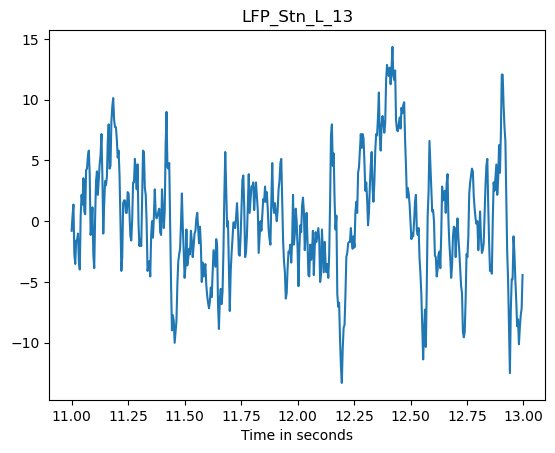

In [73]:
# plot the selected 2 arrays

x = raw_selection[1]        # time in seconds
y = raw_selection[0].T      # data from ch_trials[channel_index]

plt.plot(x, y)

plt.title(str(ch_names[channel_index]))
plt.xlabel("Time in seconds")
# plt.ylabel() ???

plt.show()

<Figure size 640x480 with 0 Axes>

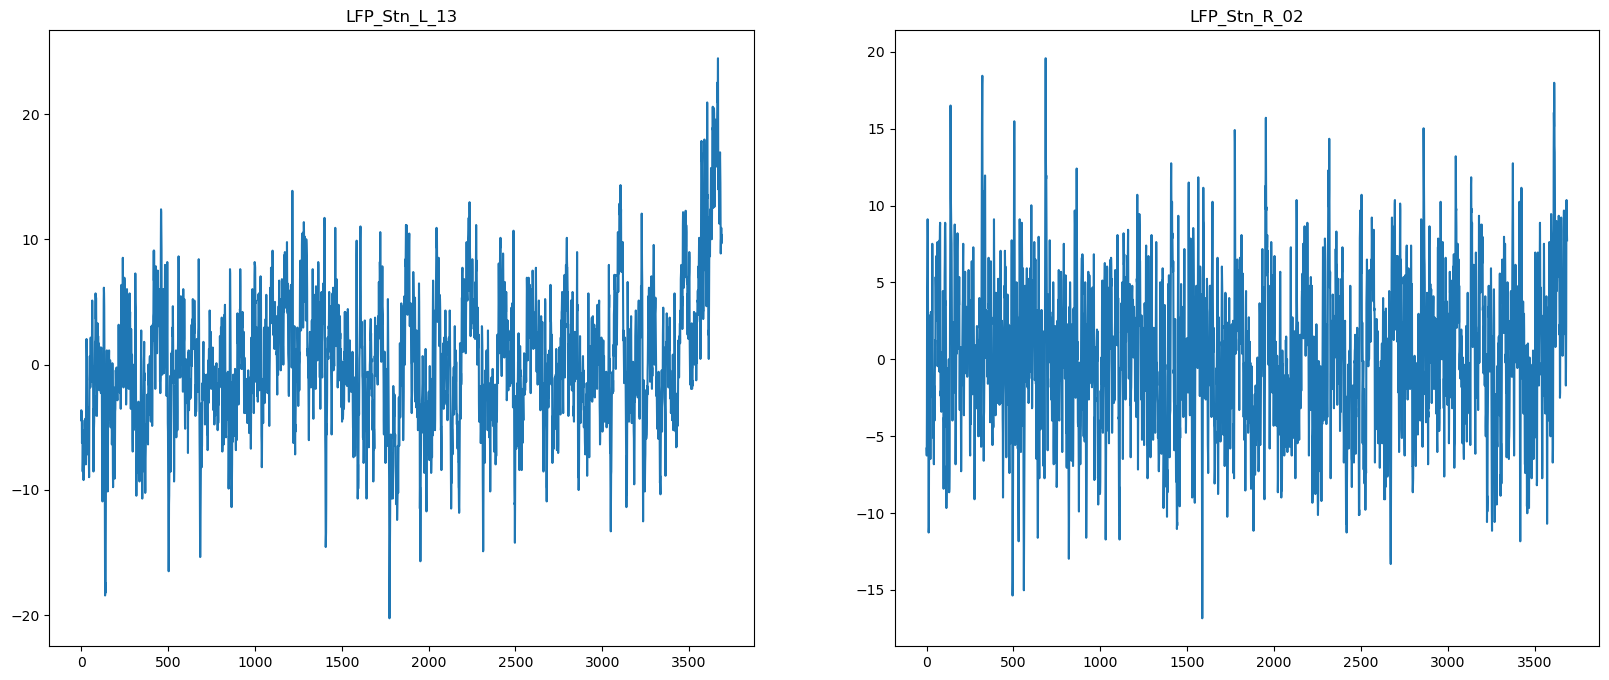

In [89]:
# plotting first and second row of data.trial from Matlab
# plotting first 2 channels 

plt.suptitle("Raw data of channels left and right")

plt.figure(figsize= (20, 8))

# plot raw data of channel LFP_Stn_L_13
plt.subplot(1,2,1)
plt.plot(ch_trials[0])
plt.title(str(ch_names[0]))

# plot raw data of channel LFP_Stn_R_02
plt.subplot(1,2,2)
plt.plot(ch_trials[1])
plt.title(str(ch_names[1]))

plt.show()


[[-4.44034504 -3.64336003 -4.44034504 ... 10.9300801   9.67767509
  10.3608051 ]]


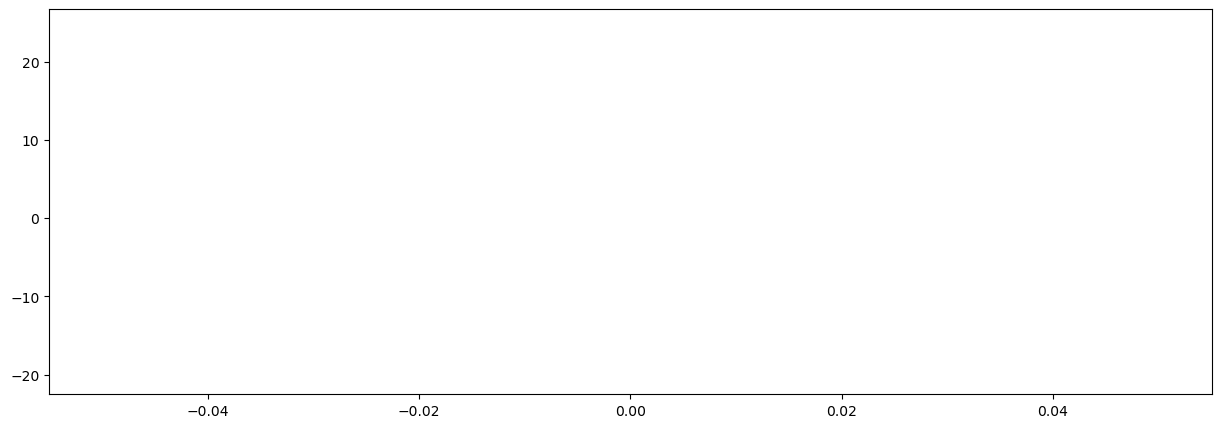

In [75]:
mydat = raw.get_data(picks='LFP_Stn_L_13') # saving row 1 from data.trial
print(mydat)

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(mydat)
plt.show()

### MNE built-in plotting 

In [90]:
# raw hast a built-in plot() method 
# this opens MNE an interactive plot window

raw.plot()

Using pyopengl with version 3.1.6


Channels marked as bad:
none


Effective window size : 1.024 (s)


/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_2210/4077106721.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum.plot(picks = chs_to_plot, average=False, color='b')
/Applications/MNE-Python/.mne-python/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


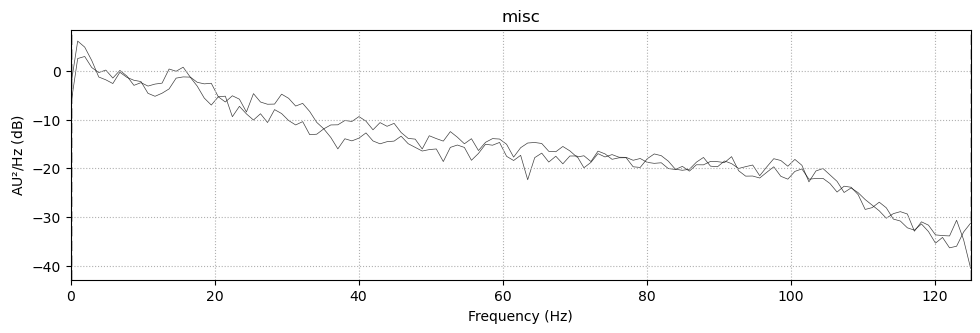

In [83]:
chs_to_plot = ['LFP_Stn_L_13', 'LFP_Stn_R_02']

# to plot spectral power create object spectrum
spectrum = raw.compute_psd(picks = chs_to_plot )

# spectrum has a built-in plot() method 
spectrum.plot(picks = chs_to_plot, average=False, color='b')

### Make some nice plots of the data

In [40]:
#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]


In [ ]:
# time to plot
plot_times = time_secs # time set to zero 

### Code from Varvara

In [ ]:
#Make some nice plots of the data

#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]

plot_times = data.times #time
xticks = np.linspace(0, plot_times[-1], 5) #make 5 x-axis ticks, dividing the seconds by 5

fig, axes = plt.subplots(
    1, len(chs_to_plot), figsize=(18, 6)
) #define n of subplots and size

# axes = axes.flatten()
ax_c = 0

for i, name in enumerate(chNamesList):

    
    if name in chs_to_plot:

        if name[-3:] == 'STN':
            axes[ax_c].psd(raw_data[i, :])
            axes[ax_c].set_title(
                f'PSD {name}',
                fontsize=16, color='r'
            )

        else:
            
            axes[ax_c].plot(plot_times, raw_data[i, :])
            axes[ax_c].set_title(name, fontsize=16, color='r')
            axes[ax_c].set_xticks(xticks)
            axes[ax_c].set_xticklabels(np.around(xticks / 60, 1))
                
        ax_c += 1
        
        
# chNamesArr == chs_to_plot

In [ ]:
a = 55.5

In [ ]:
(f'channel1 {name}, #{a}'
 ' because ut was too long')

In [ ]:
chNamesList.index(chs_to_plot)

In [ ]:
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 20, dB = False, estimate = 'amplitude')
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 60, tmax = 80,  dB = False, estimate = 'amplitude')

In [ ]:
print(type(data._data))
print(data._data.shape)
scan_durn = data._data.shape[1] / data.info['sfreq']
print('Duration of LFP recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')
print(data._data[1, :])

chan = 1 # set channel we want
start_time = int((1000 / 1000) * data.info['sfreq'])
end_time   = int((10000 / 1000) * data.info['sfreq'])
data._data[chan, start_time:end_time]

In [ ]:
mydat = data.get_data(picks=['LFP_Stn_L_13'], start=1, stop=201)
print(mydat.shape)

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(data.get_data(picks='STIM_R_125Hz_60us',start=1, stop=20000).T)
plt.show()

In [ ]:
#%matplotlib inline
data.plot(data.get_data(picks='LFP_Stn_L_13'))

In [ ]:
#Pick only channel one and two
data.info['bads'] = ['LFP_Stn_L_13','LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'] 
picks = mne.pick_types(data.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads')

In [ ]:
#events = mne.find_events(raw, stim_channel='LFP_R_13_STN')
trial_onsets = np.array([
       [ 1000 ,      0 ,    1],
       [ 15000 ,      0 ,    2 ]]) #we need the samples
event_dict = {'NoStim':1,'Threshold':2}
fig = mne.viz.plot_events(trial_onsets, sfreq=data.info['sfreq'], first_samp=data.first_samp)
epochs = mne.Epochs(data,events=trial_onsets,event_id = event_dict, tmin=0, tmax=10, baseline = None, preload = True)
epochs.plot_image(picks = 0)

In [ ]:
nostim_ep = epochs['NoStim']
stim_ep = epochs['Threshold']
stim_ep.plot_image(picks = 1)

In [ ]:
M = 200
NFFT = M
win = hanning(M)
overlap = 0.25
overlap_samples = int(round(M*overlap)) # overlap in samples
t, f, S = spectrogram(mydat,window=win,nperseg=M,noverlap=overlap_samples,nfft=NFFT)

# Compute average spectrum
avg_S = np.mean(S,axis=1)

In [ ]:
vars(tfr_morlet)

In [ ]:
freqs = np.arange(1, 125)
D = tfr_morlet(epochs, freqs=freqs, n_cycles=6, return_itc=False, average=True, picks = 1)

In [ ]:
spectrogram(
    mydat,
    fs=125.0, 
#             window=('hanning', 0.25), 
    nperseg=1, noverlap=0.25, nfft=None, detrend='constant', 
                         return_onesided=True, scaling='density', axis=- 1, mode='psd')

In [ ]:
raw = data.filter(l_freq=90, h_freq=5, picks=[0,1])

In [ ]:
#epochs.plot_psd(fmin=5, fmax=90)
D.plot(fmin=5, fmax=40, picks = 1)

In [ ]:
D.plot(mode='zlogratio', picks = 0, baseline=None,
#        vmin = -3, vmax = 8,
       cmap='viridis',
)

In [ ]:
# matplotlib
D.plot(events = trial_onsets, start = 80, duration = 7, n_channels = 1)

## 3. Preprocessing

In [54]:
# detecting power line noise
fig = raw.compute_psd(picks=chs_to_plot, tmax=np.inf, fmax=125.0, average=None).plot(picks=chs_to_plot)
fig.show()

# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 1.024 (s)
Aggregating Welch estimates (median) before plotting...


/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_2210/3965450946.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.compute_psd(picks=chs_to_plot, tmax=np.inf, fmax=125.0, average=None).plot(picks=chs_to_plot)
/Applications/MNE-Python/.mne-python/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_2210/3965450946.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [60]:
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs, compute_proj_ecg, compute_proj_eog)

# detect ecg artifacts

ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')

ValueError: Unable to generate artificial ECG channel